## Police Shooting Incidents 

Below we are going to analyze data collected from 2015-2022 revolving around deaths caused by police shootings.

In [119]:
import pandas as pd
import numpy as np

df = pd.read_csv('US_Police_Shootings.csv')
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


I collected data on several incidents and details specific to each incident (party involved, location, etc).
I refined this data by removing excess information in order to draw attention to more significant attributes of the data.

In [120]:
df = df.drop(['longitude', 'latitude', 'age', 'manner_of_death', 'body_camera', 'is_geocoding_exact', 'id', 'date'], axis = 1)
df.head(10)

,name,armed,gender,race,city,state,signs_of_mental_illness,threat_level,flee
0,Tim Elliot,gun,M,A,Shelton,WA,True,attack,Not fleeing
1,Lewis Lee Lembke,gun,M,W,Aloha,OR,False,attack,Not fleeing
2,John Paul Quintero,unarmed,M,H,Wichita,KS,False,other,Not fleeing
3,Matthew Hoffman,toy weapon,M,W,San Francisco,CA,True,attack,Not fleeing
4,Michael Rodriguez,nail gun,M,H,Evans,CO,False,attack,Not fleeing


I am searching the data frame specifically for incidents where the victim was unarmed, was identified as nonthreatning at the scene of the incident, exhibited no signs of mental illness, and did not make attempts to flee, but was still shot down and killed.This is the crtieria I will use to define an incident of 'police brutality'.

In [143]:
incidents = df.loc[(df['armed'] == 'unarmed') & (df['threat_level'] == 'other') & (df['flee'] == 'Not fleeing') & (df['signs_of_mental_illness'] == False)]
incidents.head(10)

,name,armed,gender,race,city,state,signs_of_mental_illness,threat_level,flee
2,John Paul Quintero,unarmed,M,H,Wichita,KS,False,other,Not fleeing
8,Autumn Steele,unarmed,F,W,Burlington,IA,False,other,Not fleeing
86,Joaquin Hernandez,unarmed,M,H,Tempe,AZ,False,other,Not fleeing
107,Richard Carlin,unarmed,M,H,Reading,PA,False,other,Not fleeing
124,Ruben Villalpando,unarmed,M,H,Euless,TX,False,other,Not fleeing
136,Daniel Elrod,unarmed,M,W,Omaha,NE,False,other,Not fleeing
142,Rodney Biggs,unarmed,M,W,Gulfport,MS,False,other,Not fleeing
144,Alexander Phillip Long,unarmed,M,W,Terre Haute,IN,False,other,Not fleeing
145,Ernesto Javiar Canepa Diaz,unarmed,M,H,Santa Ana,CA,False,other,Not fleeing
159,Derek Cruice,unarmed,M,W,Deltona,FL,False,other,Not fleeing


I am interested in seeing which states in the US these incidents frequently occur in. All the information needed for my project goal is ready to be downloaded into a new data frame.

In [144]:
incidents.to_csv('incidents_us.csv')

I grouped the data by state and calculated the frequency of the incidents. With this information I will be able to rank the states.

In [156]:
top_states = incidents.groupby(['state']).size().reset_index(name = 'incident count').sort_values(['incident count'], ascending = False)
print(top_states)

   state  incident count
2     CA              13
21    TX              12
3     FL               6
1     AZ               6
19    OK               5
4     GA               4
20    PA               4
18    OH               3
15    NM               3
12    MO               2
17    NY               2
7     KS               2
9     LA               2
13    MS               2
14    NE               2
22    UT               1
0     AL               1
16    NV               1
11    MD               1
10    MA               1
8     KY               1
6     IN               1
5     IA               1
23    VA               1


I will focus on the 10 highest ranking states as the number of incidents begins to slowly taper to an insignificant amount of data. These 10 states will be listed below.

In [160]:
top_states = top_states.head(10)

I will now generate a graph based on my findings.

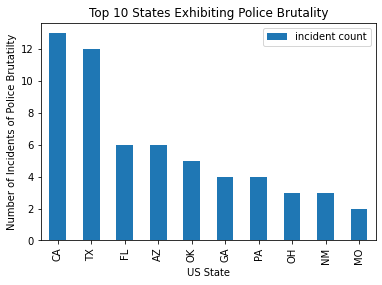

In [161]:
final_incidents = top_states.plot.bar(title = "Top 10 States Exhibiting Police Brutality", x = 'state', y = 'incident count',xlabel = "US State", ylabel = "Number of Incidents of Police Brutatilty")